<a href="https://colab.research.google.com/github/hsnam95/class2022Spring/blob/main/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn for machine learning

### Understanding iris data

In [1]:
import seaborn as sns
df = sns.load_dataset('iris')

In [ ]:
type(df)

In [ ]:
df.head()

In [ ]:
df['species'].unique()

In [ ]:
sns.pairplot(df, hue='species')

In [ ]:
x = list(df['sepal_length'])
y = list(df['sepal_width'])

import matplotlib.pyplot as plt
plt.scatter(x, y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [ ]:
df_setosa = df[df['species']=='setosa']
x = list(df_setosa['sepal_length'])
y = list(df_setosa['sepal_width'])
plt.scatter(x, y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('setosa')

### Supervised learning: regression (linear regression)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression(fit_intercept=True)

In [43]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [ ]:
X = x.reshape(-1, 1)
X.shape

In [ ]:
model.fit(X, y)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [49]:
xfit = np.linspace(4, 6)

In [50]:
Xfit = xfit.reshape(-1, 1)
yfit = model.predict(Xfit)

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
df_setosa.corr()

#### gradio implementation

In [ ]:
!pip install gradio
import gradio as gr

def test (x):
  X = np.array(x).reshape(-1,1)
  y = model.predict(X)
  return y[0]

iface = gr.Interface(test, inputs = ["number"], outputs = ["text"])
iface.launch(debug=True)

### Supervised learning: classification (Naive Bayes)

In [64]:
x = df.drop('species', axis=1) # axis = 0 (delete row) / 1 (delete column)
x.shape

(150, 4)

In [65]:
y = df['species']
y.shape

(150,)

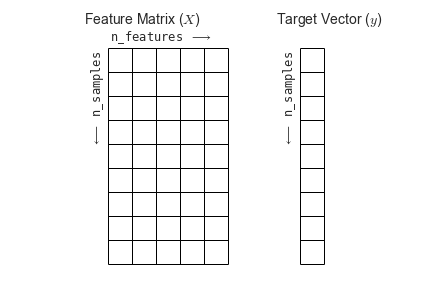

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y)

In [9]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
yout = model.predict(Xtest)                # 4. predict on new data

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, yout)

#### gradio implementation

In [ ]:
import pandas as pd
def test (in1, in2, in3, in4):
  data = {'sepal_length': [in1],
        'sepal_width': [in2],
        'petal_length': [in3],
        'petal_width': [in4]}
  Xtest = pd.DataFrame(data)
  yout = model.predict(Xtest)
  return yout

iface = gr.Interface(test, inputs = ["number", "number", "number", "number"], outputs = ["text"])
iface.launch()

### Unsupervised learning: dimensionality (PCA)

In [66]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(x)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(x)  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


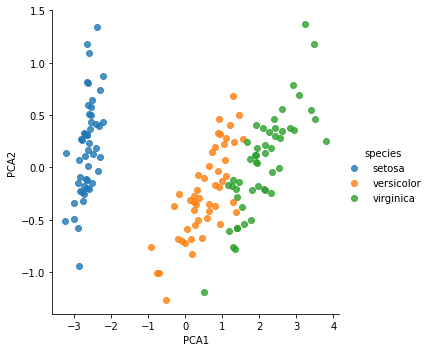

In [67]:
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=df, fit_reg=False);

#### gradio implementation

### Unsupervised learning: clustering (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture as GMM   # 1. Choose the model class
model = GMM(n_components=3, covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(x)                                         # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(x)                             # 4. Determine cluster labels

In [ ]:
df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=df, hue='species', col='cluster', fit_reg=False);